## Exercise 3
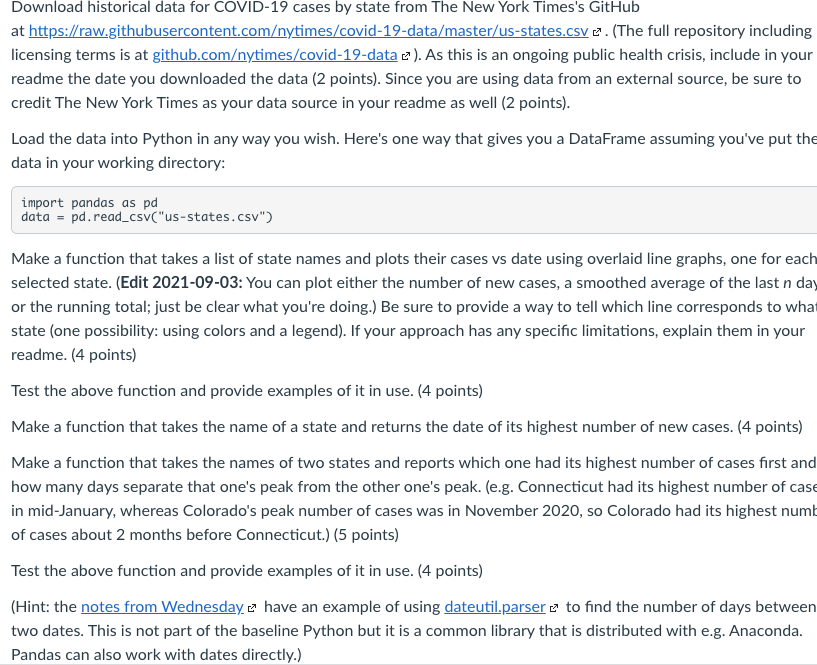

In [8]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
covid_table = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [254]:
covid_table

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
30644,2021-09-10,Virginia,51,801827,12036
30645,2021-09-10,Washington,53,599971,6977
30646,2021-09-10,West Virginia,54,205783,3207
30647,2021-09-10,Wisconsin,55,754164,8613


In [4]:
covid_table[(covid_table['state']=='Florida')&(covid_table['date']=='2021-06-03')],covid_table[(covid_table['state']=='Florida')&(covid_table['date']=='2021-06-04')]

(             date    state  fips    cases  deaths
 25158  2021-06-03  Florida    12  2329859   36972,
              date    state  fips    cases  deaths
 25213  2021-06-04  Florida    12  2289332   36985)

In [5]:
merged_covid = pd.pivot_table(covid_table,index=['state'],columns=['date'],values=['cases']).fillna(0).T

In [6]:
merged_covid

state              Alabama   Alaska    Arizona  Arkansas  California  \
      date                                                             
cases 2020-01-21       0.0      0.0        0.0       0.0         0.0   
      2020-01-22       0.0      0.0        0.0       0.0         0.0   
      2020-01-23       0.0      0.0        0.0       0.0         0.0   
      2020-01-24       0.0      0.0        0.0       0.0         0.0   
      2020-01-25       0.0      0.0        0.0       0.0         1.0   
...                    ...      ...        ...       ...         ...   
      2021-09-06  724688.0  89927.0  1032808.0  464732.0   4525630.0   
      2021-09-07  727360.0  92054.0  1034790.0  465315.0   4536771.0   
      2021-09-08  732151.0  92891.0  1037012.0  467496.0   4545832.0   
      2021-09-09  736518.0  93729.0  1039492.0  469977.0   4556775.0   
      2021-09-10  741318.0  94422.0  1042480.0  472136.0   4566746.0   

state             Colorado  Connecticut  Delaware  District of Columbia  \
      date                                                                
cases 2020-01-21       0.0          0.0       0.0                   0.0   
      2020-01-22       0.0          0.0       0.0                   0.0   
      2020-01-23       0.0          0.0       0.0                   0.0   
      2020-01-24       0.0          0.0       0.0                   0.0   
      2020-01-25       0.0          0.0       0.0                   0.0   
...                    ...          ...       ...                   ...   
      2021-09-06  630178.0     375135.0  122370.0               55918.0   
      2021-09-07  632108.0     376747.0  122718.0               56569.0   
      2021-09-08  634191.0     377682.0  122956.0               56694.0   
      2021-09-09  636018.0     378308.0  123308.0               56859.0   
      2021-09-10  637739.0     378933.0  123958.0               56966.0   

state               Florida  ...  Tennessee      Texas      Utah  Vermont  \
      date                   ...                                            
cases 2020-01-21        0.0  ...        0.0        0.0       0.0      0.0   
      2020-01-22        0.0  ...        0.0        0.0       0.0      0.0   
      2020-01-23        0.0  ...        0.0        0.0       0.0      0.0   
      2020-01-24        0.0  ...        0.0        0.0       0.0      0.0   
      2020-01-25        0.0  ...        0.0        0.0       0.0      0.0   
...                     ...  ...        ...        ...       ...      ...   
      2021-09-06  3308916.0  ...  1051599.0  3700956.0  469510.0  29125.0   
      2021-09-07  3364998.0  ...  1085109.0  3710719.0  474169.0  29325.0   
      2021-09-08  3378772.0  ...  1090264.0  3752776.0  475709.0  29436.0   
      2021-09-09  3391158.0  ...  1094159.0  3784830.0  477875.0  29588.0   
      2021-09-10  3409165.0  ...  1099118.0  3802905.0  480064.0  29735.0   

state             Virgin Islands  Virginia  Washington  West Virginia  \
      date                                                              
cases 2020-01-21             0.0       0.0         1.0            0.0   
      2020-01-22             0.0       0.0         1.0            0.0   
      2020-01-23             0.0       0.0         1.0            0.0   
      2020-01-24             0.0       0.0         1.0            0.0   
      2020-01-25             0.0       0.0         1.0            0.0   
...                          ...       ...         ...            ...   
      2021-09-06          5961.0  786910.0    577902.0       199300.0   
      2021-09-07          6071.0  788917.0    588803.0       200308.0   
      2021-09-08          6102.0  793396.0    592468.0       201660.0   
      2021-09-09          6102.0  797348.0    596505.0       203404.0   
      2021-09-10          6182.0  801827.0    599971.0       205783.0   

state             Wisconsin  Wyoming  
      date                            
cases 2020-01-21        0.0      0.0  
      2020-01-22  

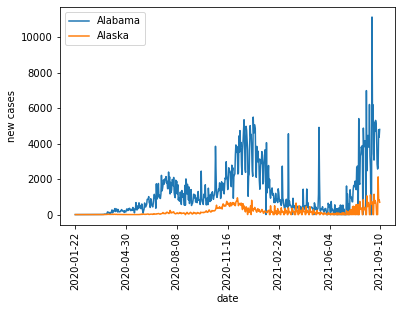

In [41]:
def cases_date_by_state(merged_covid, state_list,**n):
    for state in state_list:
        state_info = merged_covid[state].unstack().T
        new_cases = np.diff(state_info['cases'])
        plt.plot(state_info.index[1:], new_cases)
    plt.legend([state for state in state_list])
    plt.xticks(state_info.index[[1,100, 200, 300,400,500,len(state_info.index)-1]], rotation=90)
    plt.xlabel('date')
    plt.ylabel('new cases')
    plt.show()
    
# test code 
state_list = ['Alabama','Alaska']
cases_date_by_state(merged_covid, state_list)
            


In [25]:
def max_new_cases(state):
    state_info = merged_covid[state].unstack().T
    new_cases = np.diff(state_info['cases'])
    index = np.argmax(new_cases)
    
    return state_info.T.columns[index+1]
max_new_cases('Connecticut')

'2020-12-28'

In [35]:
from dateutil.parser import parse as parse_date


def average_increase_7_peak(state):
    state_info = merged_covid[state].unstack().T
    new_cases = np.diff(state_info['cases'])
    ave_7 = np.zeros(7)
    for i in range(7, len(state_info.index)):
        ave_7 = np.append(ave_7, np.mean(new_cases[i-6:i+1]))
    index = np.argmax(ave_7)
    
    return state_info.T.columns[index+1]


def report_2_states(state1, state2):
    date1 = parse_date(average_increase_7_peak(state1))
    date2 = parse_date(average_increase_7_peak(state2))
    sep = (date2 - date1).days
    print(f'{state1 if sep>=0 else state2} had its highest number of cases {sep} days before {state2 if sep>0 else state1}.')

In [40]:
report_2_states('Colorado','Connecticut')

Colorado had its highest number of cases 55 days before Connecticut.


In [30]:
average_increase_7_peak('Connecticut')

'2021-01-13'